In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation
import time
import struct
import tensorflow as tf
import random as rd
import pickle as pickle

from array import array
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

# my project
from module.conf import PROJECT_DIR

# %matplotlib tk
%matplotlib inline


In [15]:
def read_images_labels(data_filepath) -> tuple:
    labels = []
    images = []
    for path in data_filepath:
        with open(file = path, mode="rb") as f:
            dict_data = pickle.load(file=f, encoding="bytes")
            dd = dict_data[b'data']
            for ind, val in enumerate(dd):
                label = dict_data[b'labels'][ind]
                img = np.asarray(dd[ind]).reshape(3, 32, 32).transpose(1, 2, 0)
                labels.append(label)
                images.append(img)
                pass
            pass
        pass
    return images, labels

def load_data() -> tuple:
    cifar_path = "/data/sample/cifar-10-batches-py"
    label_name_filepath = "".join([PROJECT_DIR, cifar_path, "/batches.meta"])
    training_data_filepaths = [
        "".join([PROJECT_DIR, cifar_path, "/data_batch_1"]), 
        "".join([PROJECT_DIR, cifar_path, "/data_batch_2"]), 
        "".join([PROJECT_DIR, cifar_path, "/data_batch_3"]), 
        "".join([PROJECT_DIR, cifar_path, "/data_batch_4"]), 
        "".join([PROJECT_DIR, cifar_path, "/data_batch_5"]), 
    ]
    test_data_filepaths = ["".join([PROJECT_DIR, cifar_path, "/test_batch"])]
    x_train, y_train = read_images_labels(training_data_filepaths)
    x_test, y_test = read_images_labels(test_data_filepaths)
    with open(file="".join([PROJECT_DIR, cifar_path, "/batches.meta"]), mode="rb") as f:
        label_names = pickle.load(file=f, encoding="bytes")[b'label_names']
        pass
    return (x_train, y_train),(x_test, y_test), label_names

(X_train, y_train), (X_test, y_test), label_names = load_data()

[array([[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],
 
        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],
 
        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],
 
        ...,
 
        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],
 
        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],
 
        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
  

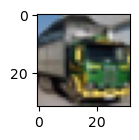

label[9]:b'truck'


In [19]:
ind = 14
fig, ax = plt.subplots(figsize=(1.6, 1.2))
ax.imshow(X=X_train[ind])
plt.show()
print(f"label[{y_train[ind]}]:{label_names[y_train[ind]]}")